In [1]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sn.set()

### 한글 깨짐 설정
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if( platform.system() =='Darwin' ):
    rc( 'font', family='AppleGothic' )
elif( platform.system() == 'Windows'):
    path='c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties( fname=path ).get_name()
    rc('font',family=font_name)
else:
    print('error')

### 결정 트리

- 분류, 회귀, 다중 출력 작업이 가능한 다재다능한 머신러닝 알고리즘
- 매우 복잡한 데이터 셋도 학습 가능

### 6.1 결정 트리 학습과 시각화

> Scikit-Learn은 **이진 트리**만 만드는 **CART** 알고리즘을 사용하기 때문에, 리프 노드를 제외한 모든 노드는 자식노드를 2개씩 가진다(조건에 대해, 'yes' or 'no'). 하지만, **ID3** 알고리즘을 이용해 2개 이상의 자식 노드를 가지는 결정트리를 만들 수 있다.  

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, 
                out_file='iris_tree.dot', 
                feature_names=["꽃잎 길이 (cm)", "꽃잎 너비 (cm)"], 
                class_names=iris.target_names, 
                rounded=True, 
                filled=True)

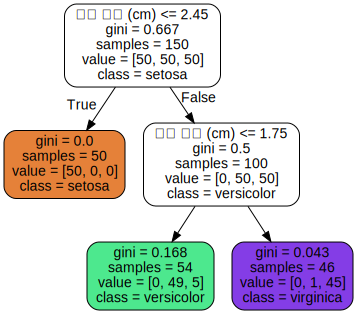

In [5]:
import graphviz

with open("iris_tree.dot", encoding='UTF8') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree', directory='./images', cleanup=True)
dot

- `sample` : 각 노드로 분류된 데이터의 개수를 말한다.
- `value` : 각 노드에서 label(여기서는 `setosa, versicolor, virginica`)에 속하는 데이터의 개수를 말한다.
    - 예를 들어, 왼쪽 주황색 노드는 `setosa`가 50개, `versicolor, virginica`는 0개를 의미한다.

- `gini` : **불순도**(impurity)를 의미하며, 불순도를 측정하는 지표인 **지니(gini)** 계수를 이용한다.
    - 예를 들어, level 2의 초록색 노드의 gini 계수는 $1-(\frac{0}{54})^{2} - (\frac{49}{54})^{2} - (\frac{5}{54})^{2} \approx 0.168$ 이다. 
   
    - Gini 계수의 수식은 다음과 같다.

    $$
    G_i = 1 - \sum_{k=1}^{n}{p_{i,k}^{2}}
    $$

    - $p_{i, k}$ 는 $i$번째 노드에 있는 데이터 중 클래스 $k$에 속한 샘플의 비율이다.
    
### 6.2 예측하기

- 예측 과정
    1. 맨위의 노드인 **루트 노드**(root node)에서 꽃잎의 길이(petal length)가 `2.45cm`보다 짧은지 비교한다.
    2. `2.45cm`보다 짧다면 왼쪽 노드(주황색)인 **자식 노드**(child node)로 이동한다.
        - 이 경우에는 더 이상의 자식 노드가 없으므로 **리프 노드**(leaf node)가 된다.
        - 그리고, 꽃의 종류를 `setosa`라고 예측한다.
    3. 반대로, `2.45cm` 보다 긴 경우 오른쪽 자식 노드로 가며, 꽃잎 너비가 `1.75cm` 보다 짧은지 비교하게 된다. 
    4. 꽃잎의 너비가 `1.75cm` 보다 짧으면 왼쪽 리프 노드(초록색)로 가게되며, `versicolor`라고 예측하며, `1.75cm` 보다 길면, 오른쪽 리프 노드(보라색)으로 가게되며, `virginica`로 예측한다. 
    
- Decision Tree 장점
    > Decision Tree 의 장점은 데이터 전처리가 거의 필요하지 않다는 것이며, 특히 특성(feature)의 스케일을 맞추거나 평균을 원점에 맞추는 작업(`StandardScaler`)이 필요하지 않다.

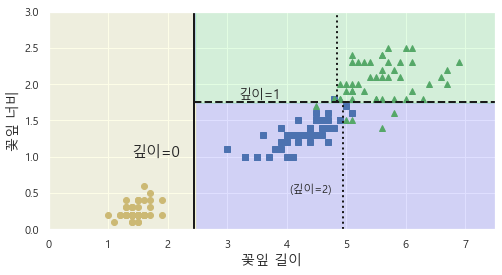

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("꽃잎 길이", fontsize=14)
        plt.ylabel("꽃잎 너비", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "깊이=0", fontsize=15)
plt.text(3.2, 1.80, "깊이=1", fontsize=13)
plt.text(4.05, 0.5, "(깊이=2)", fontsize=11)

plt.show()

- **화이트박스 vs 블랙박스**
    - 결정 트리 모델은 매우 직관적이며, 모델의 예측 즉, 결정 방식을 이해하기 쉽다. 이러한 모델을 **화이트박스**(white box) 모델
    - 반대로, 랜덤포레스트나 신경망은 이러한 결정 방식을 이해하기에는 어렵기 때문에 **블랙박스**(black box)모델이라 한다.
    
    
### 6.3 클래스 확률 추정

예를 들어, 꽃잎의 길이가 5cm이고, 너비가 1.5cm인 경우에는 위의 그래프에서 초록색 노드로 분류될 것이다. 이러한 확률을 계산하면, $\text{setosa} = \frac{0}{54} = 0$, $\text{versicolor} = \frac{49}{54} = 0.907$, $\text{virginica} = \frac{5}{53} = 0.093$ 이다.

In [7]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5, 1.5]])

array([1])

### 6.4 CART 훈련 알고리즘

- CART 알고리즘은 먼저 학습 데이터셋(train set)을 하나의 특성(feature) $k$의 임계값 $t_k$를 사용해 두 개의 서브셋(child node)로 나눈다.
- 예를 들어, 위의 그래프에서 루트 노드(root node)는 꽃잎의 길이(petal length)라는 특성을 임계값 2.45로 (**꽃잎의 길이 $\le$ 2.45cm**)로 `True/False`로 나눴다. 


- **비용 함수**
$$
J\left(k, t_k \right) = \frac{m_{\text{left}}}{m} G_{\text{left}} + \frac{m_{\text{right}}}{m} G_{\text{right}}
$$

- $G_{\text{left/right}}$ : 왼쪽/오른쪽 자식노드의 불순도(지니계수)
- $m_{\text{left/right}}$ : 왼쪽/오른쪽 자식노드의 데이터(샘플) 수


- 자식 노드(subset)로 나누는 과정을 결정 트리의 최대 깊이(sklearn에서는 `max_depth` 인자) 또는 불순도를 줄일 수 있는 분할을 찾을 수 없을 때까지 반복한다.

이렇듯 CART 알고리즘은 각 단계 즉, 각 노드에서 그 다음 자식 노드로 분할할때 가장 좋은 최적의 분할만 찾아갈 뿐, 현재 단계의 분할이 몇 단계를 거쳐 가장 낮은 불순도가 될지는 고려하지 않는다. 이러한 알고리즘을 **탐욕적 알고리즘**(greedy algorithm)이라고 한다.

따라서, 최적의 결정 트리를 찾는 것은 **NP-완전**(NP-Complete)문제이며, $O(\exp{(m)})$시간이 필요하다. 따라서, 교재의 표현처럼 *납득할만한 좋은 솔루션* 으로만 만족해야 한다.

### 6.5 계산 복잡도

- 일반적인 결정 트리는 대부분 좌/우 균형을 이루기 때문에 약 $O(\log_{2}{(m)})$ 개의 노드를 탐색해야 한다.
- 학습 단계에서는 각 노드마다 모든 데이터를 모든 특성($n$)에 비교하므로, 학습 단계에서의 복잡도는 $O(n \times m \log{(m)})$이다. 따라서, 학습 단계에서의 속도는 데이터의 크기가 클 수록 느리다.

### 6.6 지니 불순도 또는 엔트로피?

- 하나의 특성에서 두 개의 서브셋으로 나누는 기준은 **불순도(impurity)**를 **최소**(또는, 순도, homogeneity를 최대)로 하는 것이다. 이렇게 불순도 즉, 불확실성이 감소하는 것을 정보이론에서는 **정보획득**(Information Gain)
- 기본값(default)으로 지니 계수(`Gini`)가 사용되지만, `criterion` 인자를 `"entropy"`로 설정하면, **엔트로피** 지표를 사용할 수 있다.


**엔트로피 계수**

$$
H_i = - \sum_{\underset{p_{i,k} \neq 0}{k=1}}^{n}{p_{i,k} \log_{2}{\left( p_{i, k} \right)}}
$$

- 예를 들어,  level 2의 초록색 노드의 엔트로피 계수는 $-\frac{49}{54} \log_{2}{\left( \frac{49}{54} \right)} -\frac{5}{54} \log_{2}{\left( \frac{5}{54} \right)} \approx 0.445$ 이다.

**둘 중 어느 계수를 사용할까?**

지니(Gini)나 엔트로피(Entropy) 계수 둘 다 비슷한 트리를 만든다. 지니 계수가 계산이 조금 더 빠르기 때문에 Scikit-Learn에서는 지니 계수를 기본값을 사용한다. 

하지만, 지니 계수는 가장 빈도가 높은 클래스를 한쪽 가지(branch)로 고립시키는 경향이 있다고 한다.

### 6.7 규제 매개변수

의사결정나무 모델이 학습 데이터에 과적합 되는 것을 방지하기 위해 몇 가지 규제(regularization)가 있는데, 일반적으로 결정 트리의 **깊이(depth)**를 조절한다. Scikit-Learn에서는 `max_depth` 인자로 트리의 깊이를 설정할 수 있다. 

[`DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)에서는 트리의 깊이(`max_depth`) 뿐만 아니라 규제를 하기위한 다른 인자들이 있다. 아래의 매개변수에서 `min_`으로 시작하는 매개변수를 증가 시키거나, `max_`로 시작하는 매개변수를 감소시키면 모델에 규제가 **커진다**.

- `min_samples_split` : 분할되기 위해 노드가 가져야 하는 최소 샘플(데이터) 수
- `min_samples_leaf` : 리프 노드가 가지고 있어야 하는 최소 샘플 수
- `min_weight_fraction_leaf` : `min_samples_leaf`와 같지만 가중치가 부여된 전체 샘플 수에서의 비율
- `max_leaf_nodes` : 리프 노드의 최대 개수
- `max_features` : 각 노드에서 분할에 사용할 특성의 최대 수

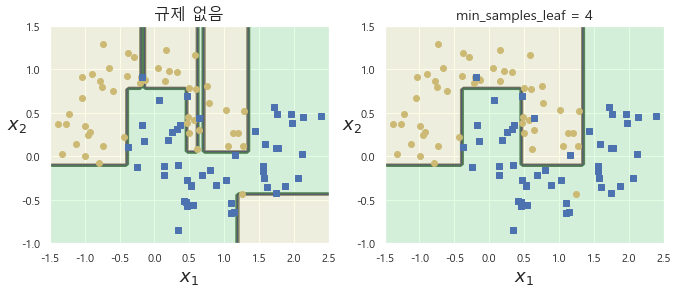

In [9]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("규제 없음", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

**가지치기(pruning)**

**가지치기**(pruning)는 결정트리를 아무런 규제 없이 학습 시킨 뒤 불필요한 노드를 제거하는 방법을 말하며, 마치 나무에서 불필요한 가지를 자르는 것과 같기 때문에 가지치기라 한다.

불순도를 최소화하는 것이 **통계적으로** 효과가 없다면 리프 노드는 필요없는 노드라 할 수 있다. 이렇게 판단하는 기준은 **$\chi^{2}$ 검정**(chi-squared, 카이 제곱검정)을 사용하며, **$p$-value** 값이 $0.05$보다 높으면 해당 노드는 불필요한 노드로 추정하여 해당 노드의 자식 노드를 가지치기 한다.

### 6.8 회귀

In [10]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

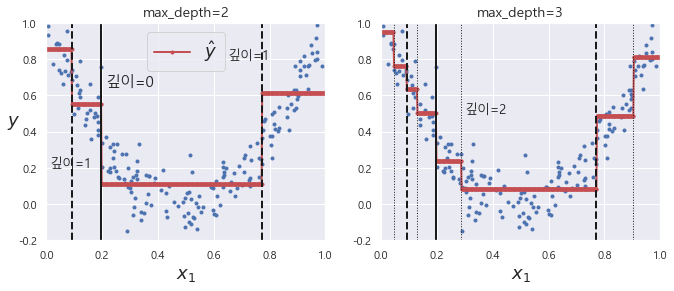

In [12]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "깊이=0", fontsize=15)
plt.text(0.01, 0.2, "깊이=1", fontsize=13)
plt.text(0.65, 0.8, "깊이=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "깊이=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

In [13]:
# max_depth = 2
export_graphviz(
        tree_reg1,
        out_file="regression_tree.dot",
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

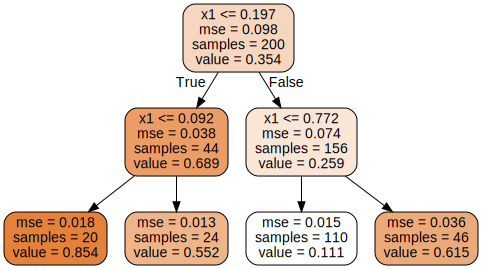

In [15]:
import graphviz
with open("regression_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='regression_tree', directory='decision_trees', cleanup=True)
dot

- CART 알고리즘은 학습 데이터셋을 평균제곱오차(MSE)를 최소화하도록 트리를 분할한다.

$$
J\left(k, t_k \right) = \frac{m_{\text{left}}}{m} \text{MSE}_{\text{left}} + \frac{m_{\text{right}}}{m} \text{MSE}_{\text{right}}
$$

$$
\begin{cases} \text{MSE}_{\text{node}} = \sum_{i \in \text{node}}{\left( \hat{y}_\text{node} - y_i \right)^{2}} \\ \hat{y}_\text{node} = \frac{1}{m_\text{node}}\sum_{i \in \text{node}}{y_i} \end{cases}
$$

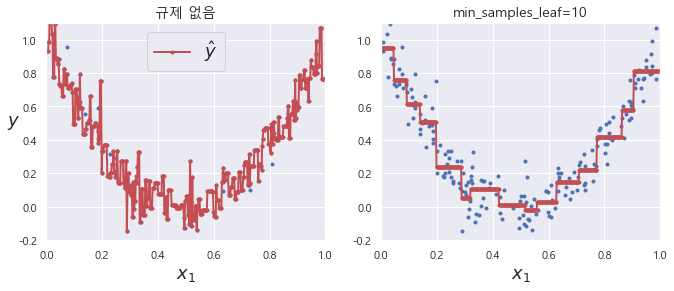

In [16]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("규제 없음", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

### 6.9 불안정성

- 결정 트리 단점
    - 계단 모양의 결정 경계
    - 훈련 세트의 회전에 민감 => PCA기법을 사용
    - 훈련 데이터에 있는 작은 변화에도 매우 민감

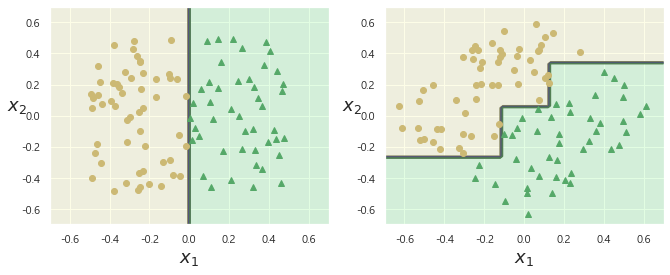

In [17]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

In [18]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # 가장 너비가 큰 Iris-Versicolor

array([[4.8, 1.8]])

In [19]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

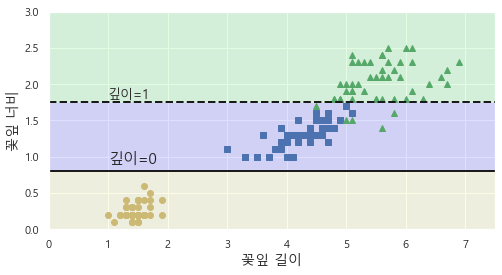

In [20]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "깊이=0", fontsize=15)
plt.text(1.0, 1.80, "깊이=1", fontsize=13)

plt.show()